# Corona
### Correlation as features
---
# Feature Subset Selection
---

#### Abstract
Feature subset selection (FSS) is a known technique to pre-process the data before performing any data mining tasks, e.g., classification and clustering. FSS provides both cost-effective predictors and a better understanding of the underlying process that generated data. We propose Corona, a simple yet effective supervised feature subset selection technique for Multivariate Time Series (MTS).

#### Data
Multi-variant time series data of SWAM_SF.

---

#### Model

![model](/images/model.PNG)

---

### Setup Project
- git clone https://ShreeTalla@bitbucket.org/gsudmlab/mvts_fss_st.git
- cd mvts_fss_st
- python -m venv venv
- source ./venv/bin/activate
- (venv) mvts_fss_st> pip3 install -r ./requirements.txt

---
### Folder Structure

![Folder stucture](/images/folder_structure.PNG)

---

### Steps:
1. [Import required libraries](#)
2. [Undersample](#under)
3. [Corona(FSS)](#corona)
4. [Ranks](#rank)
5. [Evaluate](#10)
    - [10-iteration](#10)
    - [Multivariant Report](#multi)
    - [Univariant Report](#uni)

#### Import required libraries

In [6]:
from feature_selection.vectorize import Vectorize
from feature_selection.corona import Corona
import numpy as np
import pandas as pd
from undersampling.undersampling import Undersampling
from data_cleaning import clean_data as cd
from sklearn.metrics import confusion_matrix
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.svm import TimeSeriesSVC
from evaluation_metric import evaluation_metric as em
import matplotlib.pyplot as plt
import seaborn as sns

<a id="under"></a>
## Undersample
Undersampling data using climatelogy preserving 

In [3]:
undersample = Undersampling(r"D:\GSU_Assignments\Summer_sem\6999\partition1_instances\partition1", ["FL","NF"],24)
undersample.get_flare_type_metadata()
undersample.get_undersample_metadata()

sampling M done
sampling X done
sampling B done
sampling C done
sampling FQ done


(2416, 237, 285, 410, 1958)

In [4]:
cm_list = undersample.final_list

<a id="corona"></a>
## Corona

In [9]:
corona = Corona(cm_list, 24, 10)
corona.feature_matrix()
corona.get_classes()
features = corona.features
classes = corona.classes
ranks = corona.rank_variables()
ranks_weights = corona.arrange_ranks(ranks)
ranks_weights = np.sum(symmetric_matrix,axis=0)
ranks_weights = ranks_weights

<a id="rank"></a>
###  Ranks

In [8]:
df_sort = pd.read_excel("ranks.xlsx")
fig, ax = plt.subplots(figsize=(4, 7))
sns.barplot(y=df_sort["features"], x=df_sort["rank"],color = '#0000ff', ax=ax)

<AxesSubplot:xlabel='rank', ylabel='features'>

<a id="10"></a>
## Evaluation of FSS
### 10 - iteration for different undersampled data(all 24 features)
**Model**

In [ ]:
model = TimeSeriesSVC(kernel="linear")
iter10_results = list()

**Test data** *partition 2 data*

In [ ]:
test_data = cd.folder_2_dataset(r'C:\Users\shreejaa talla\Downloads\partition2_instances\partition2',["NF","FL"],rank_features)

**Calculating HSS and TSS**

In [ ]:
%%time
for i in range(1,11):
    undersample = Undersampling(r"C:\Users\shreejaa talla\Downloads\partition1_instances (1)\partition1",["FL","NF"], rank_features)
    undersample.get_flare_type_metadata()
    undersample.get_undersample_metadata()
    x_train, y_train = zip(*undersample.final_list)
    x_train_norm = TimeSeriesScalerMinMax().fit_transform(x_train)
    x_train = np.nan_to_num(x_train_norm)
    x_test, y_test = zip(*test_data)
    x_test_norm = TimeSeriesScalerMinMax().fit_transform(x_test)
    x_test = np.nan_to_num(x_test_norm)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    hss = em.hss(cm)
    tss = em.tss(cm)
    result = {"iteration":i,"HSS":hss,"TSS":tss}
    iter10_results.append(result)
    print(result)

**Results** *results are saved to file ten_iterations.xlsx*

[Text(0, 0.5, '')]

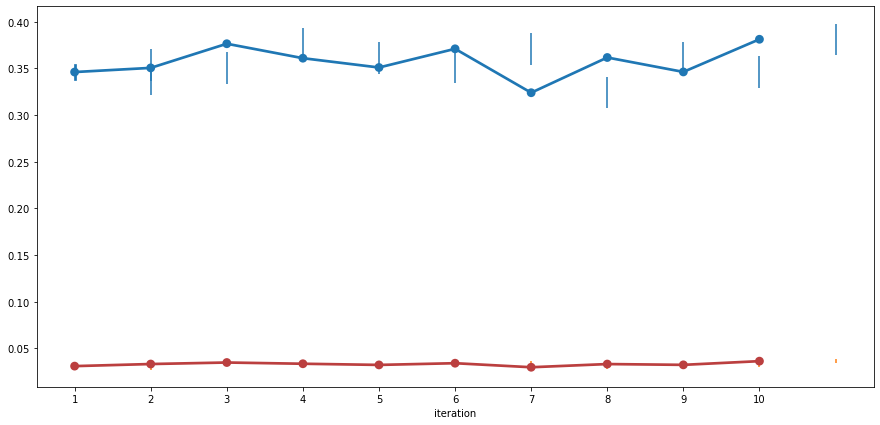

In [7]:
df = pd.read_excel('ten_iterations.xlsx')
fig, ax = plt.subplots(figsize=(15, 7))
g = sns.pointplot(x="iteration", y="TSS", data=df,ax=ax)
errors =  df["TSS"].std()
g.errorbar(df["iteration"], df["TSS"], yerr=errors,
     fmt=' ', zorder=-1)
g = sns.pointplot(x="iteration", y="HSS",color="#bb3f3f",  data=df,ax=ax)
errors1 =  df["HSS"].std()
g.errorbar(df["iteration"], df["HSS"], yerr=errors1,
     fmt=' ', zorder=-1)
g.set(ylabel=None)

<a id="multi"></a>
## Multi-variant Report

In [ ]:
%%time
for i in range(0, len(rank_features)):
    if i == 0:
        features = rank_features
    else:
        features = rank_features[:-i] 
    test_data = cd.folder_2_dataset(r'C:\Users\shreejaa talla\Downloads\partition2_instances\partition2',["NF","FL"],features)
    for j in range(1,6):
        undersample = Undersampling(r"C:\Users\shreejaa talla\Downloads\partition1_instances (1)\partition1",["FL","NF"], features)
        undersample.get_flare_type_metadata()
        undersample.get_undersample_metadata()
        x_train, y_train = zip(*undersample.final_list)
        x_train_norm = TimeSeriesScalerMinMax().fit_transform(x_train)
        x_train = np.nan_to_num(x_train_norm)
        x_test, y_test = zip(*test_data)
        x_test_norm = TimeSeriesScalerMinMax().fit_transform(x_test)
        x_test = np.nan_to_num(x_test_norm)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
        hss = em.hss(cm)
        tss = em.tss(cm)
        result = {"Features": "f" + str(len(rank_features) - i),"HSS":hss,"TSS":tss, "iteration":j}
        eval2.append(result)
        print(result)

[Text(0, 0.5, '')]

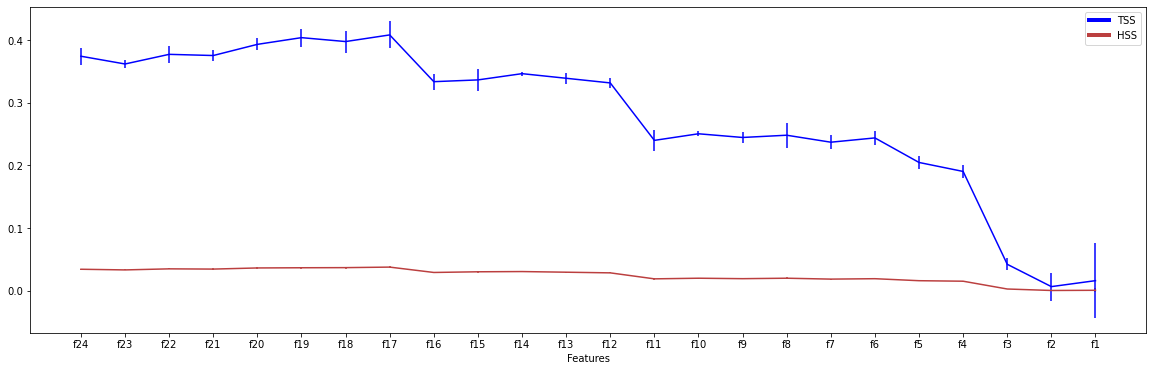

In [9]:
from matplotlib.lines import Line2D

df_final = pd.read_excel("Final_multivariant.xlsx")
custom_lines = [Line2D([0], [0], color="#0000ff", lw=4),
                Line2D([0], [0], color="#bb3f3f", lw=4)]

fig, ax = plt.subplots(figsize=(20,6))
g = sns.lineplot(x="Features", y="mean_TSS",color="#0000ff", label="TSS", data=df_final,ax=ax)
g.errorbar(df_final["Features"], df_final["mean_TSS"], yerr=df_final['std_TSS'],color="#0000ff",
     fmt=' ', zorder=0)
a = sns.lineplot(x="Features", y="mean_HSS",color="#bb3f3f", data=df_final,ax=ax)
a.errorbar(df_final["Features"], df_final["mean_HSS"], yerr=df_final['std_HSS'],color="#bb3f3f",
     fmt=' ', zorder=-1)
ax.legend(custom_lines, ['TSS', 'HSS'])
g.set(ylabel=None)

<a id="uni"></a>
## Uni-varient Report

In [ ]:
eval1 = list()
for features in rank_features:
    test_data = cd.folder_2_dataset(r'C:\Users\shreejaa talla\Downloads\partition2_instances\partition2',["NF","FL"],[features])
    for j in range(1,6):
        undersample = Undersampling(r"C:\Users\shreejaa talla\Downloads\partition1_instances (1)\partition1",["FL","NF"], [features])
        undersample.get_flare_type_metadata()
        undersample.get_undersample_metadata()
        x_train, y_train = zip(*undersample.final_list)
        x_train_norm = TimeSeriesScalerMinMax().fit_transform(x_train)
        x_train = np.nan_to_num(x_train_norm)
        x_test, y_test = zip(*test_data)
        x_test_norm = TimeSeriesScalerMinMax().fit_transform(x_test)
        x_test = np.nan_to_num(x_test_norm)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
        hss = em.hss(cm)
        tss = em.tss(cm)
        result = {"Features": features,"HSS":hss,"TSS":tss, "iteration":j}
        eval1.append(result)
        print(result)

[Text(0, 0.5, '')]

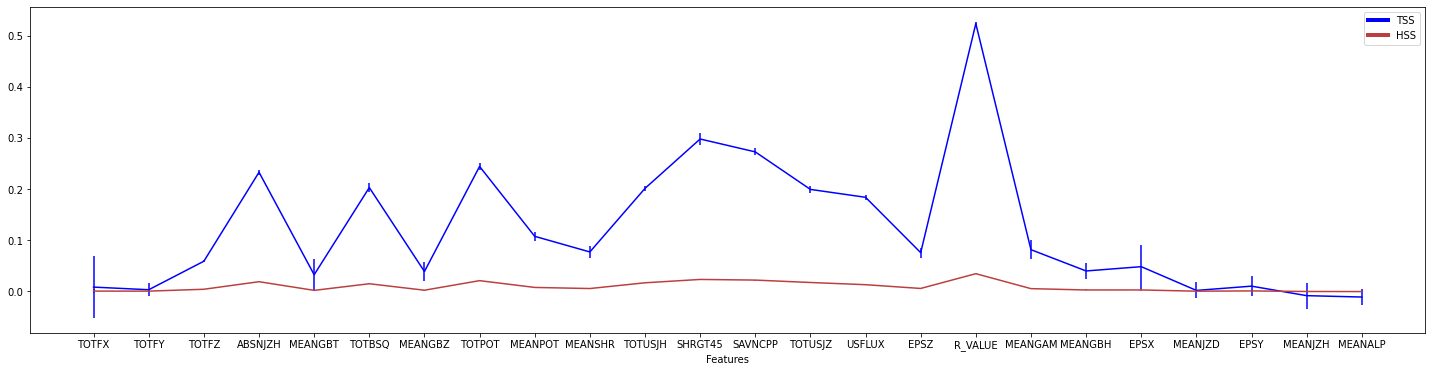

In [11]:
df_final = pd.read_excel("Final_univariant.xlsx")
custom_lines = [Line2D([0], [0], color="#0000ff", lw=4),
                Line2D([0], [0], color="#bb3f3f", lw=4)]

fig, ax = plt.subplots(figsize=(25,6))
g = sns.lineplot(x="Features", y="mean_TSS",color="#0000ff", label="TSS", data=df_final,ax=ax)
g.errorbar(df_final["Features"], df_final["mean_TSS"], yerr=df_final['std_TSS'],color="#0000ff",
     fmt=' ', zorder=0)
a = sns.lineplot(x="Features", y="mean_HSS",color="#bb3f3f", data=df_final,ax=ax)
a.errorbar(df_final["Features"], df_final["mean_HSS"], yerr=df_final['std_HSS'],color="#bb3f3f",
     fmt=' ', zorder=-1)
ax.legend(custom_lines, ['TSS', 'HSS'])
g.set(ylabel=None)

### Complete report [here](https://sites.google.com/view/gsu-codesprint-2021/st)